ANN(Arificial Neual Network)
  - 생물학적 신경망을 모방
  - 비선형 모델
  - 입력층 : 입력데이터 받는다(shape 모양을 참고)
  - 은닉층 : 입력데이터를 처리하고 특징을 추출(활성화함수 ReLU, Sigmoid 등)
  - 출력층 : 예측값이나 분류 결과를 반환

ANN은 학습과정에서 **가중치(Weight)** 와 **바이어스(Bias)**를 업데이트하고, 손실함수(Loss Function)을 최소화 하는 방향으로 최적화  

XOR 문제 해결

In [1]:
import numpy as np
X = np.array([[0,0],[0,1],[1,1],[1,0]])
y = np.array([[0],[1],[0],[1]])
X.shape, y.shape

((4, 2), (4, 1))

In [2]:

from tensorflow.keras.models import Sequential # 레이어들을 결합
from tensorflow.keras.layers import Dense  # 레이어  (input,hideen ,out)
from tensorflow.keras.optimizers import SGD  # 옵티마이져 - 최적화 , 경사하강법을 적용 - 기울기를 계산 가중치 업데이트

# 모델 정의
model = Sequential([
 Dense(4, input_dim=2, activation = 'relu'),   # 은닉층(노드 4개 ,활성화 함수 ReLU)
 Dense(1, activation='sigmoid')  # 출력층(노드 1개 ,활성화 함수 Sigmoid)
])
# 모델 컴파일  최적화 알고리즘을 적용
model.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X,y,epochs=1000, verbose=0)

# 결과 확인
print(f'predict :{model.predict(X).round()}')
print(f'real : {y}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
predict :[[0.]
 [1.]
 [0.]
 [1.]]
real : [[0]
 [1]
 [0]
 [1]]


이미지 분류 - MNIST 데이터 셋 ( 전처리가 되어 있는)

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [4]:
(X_train,y_train),(X_test,y_test) =  mnist.load_data()
X_train.shape, y_train.shape,  X_test.shape, y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

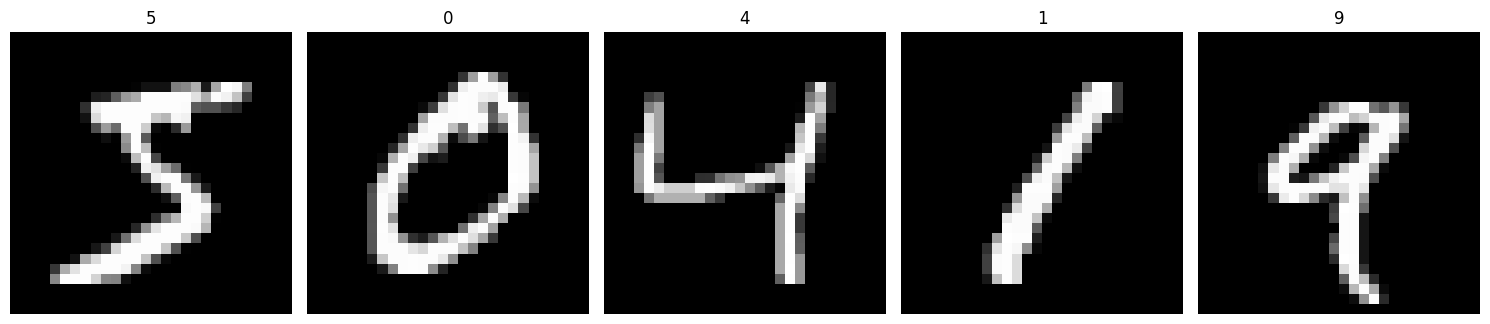

In [5]:
# 시각화
import matplotlib.pyplot as plt
fig, axes =  plt.subplots(1,5,figsize=(15,5))
for i, ax in enumerate(axes):
  ax.imshow(X_train[i],cmap='gray')
  ax.set_title(y_train[i])
  ax.axis('off')
plt.tight_layout()
plt.show()

In [9]:
# 모델정의
model = Sequential([
  Flatten(input_shape=(28,28)),
  Dense(128,activation='relu'),  # 은닉층에서는 성능이 좋은 relu 활성화 함수
  Dense(64,activation='relu'),
  Dense(10,activation='softmax')  # 최종 출력은 softmax를 사용 ( 다중 분류)  이중 분류 sigmoid
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

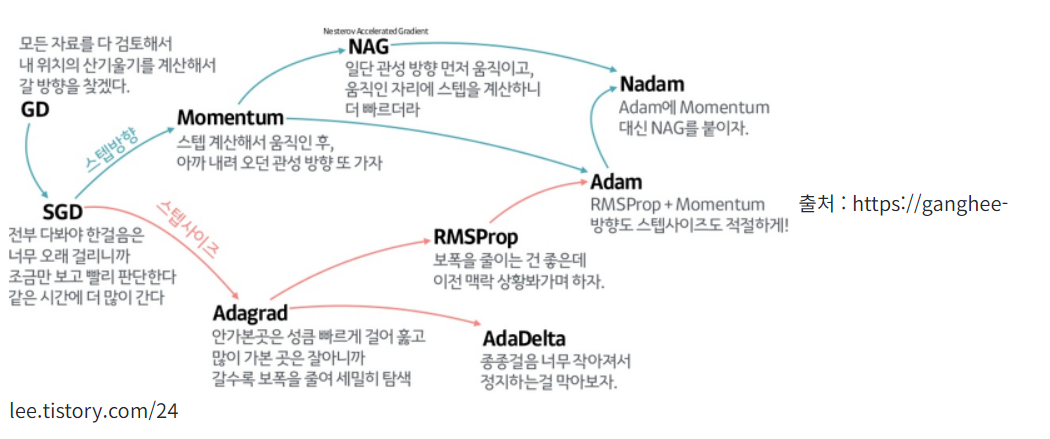

In [10]:
# 모델 컴파일
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
# 모델 학습
hist = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7746 - loss: 6.2714 - val_accuracy: 0.8991 - val_loss: 0.3899
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9167 - loss: 0.3278 - val_accuracy: 0.9316 - val_loss: 0.2650
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9376 - loss: 0.2328 - val_accuracy: 0.9464 - val_loss: 0.2009
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9494 - loss: 0.1805 - val_accuracy: 0.9408 - val_loss: 0.2242
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9561 - loss: 0.1533 - val_accuracy: 0.9532 - val_loss: 0.1705
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9654 - loss: 0.1213 - val_accuracy: 0.9483 - val_loss: 0.1816
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9682 - loss: 0.1105 - val_accuracy: 0.9550 - val_loss: 0.1728
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9705 - loss: 0.1055 - 

In [12]:
# 학습결과 시각화

In [13]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

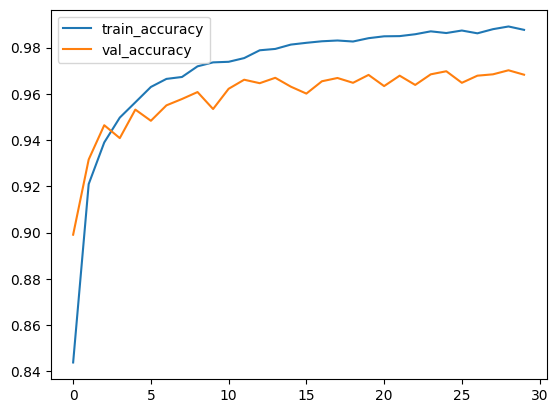

In [14]:
# 손실값 시각화
plt.plot(hist.history['accuracy'], label='train_accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [16]:
# 성능평가
model.evaluate(X_test, y_test)  # accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9617 - loss: 0.2420


[0.21589167416095734, 0.9677000045776367]

In [23]:
# accuracy가아닌 다양한 관점에서 평가를  혼돈매트릭스를 평가 도구로 사용
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.97      1032
           3       0.94      0.97      0.95      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.94      0.96       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

